In [32]:
## Import relevant libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
from utils.logo import add_logo
import os

In [34]:
## Set colors and pull raw data

In [35]:
# For colors
color_palette = {'Hyperliquid':'#09b882', 'Bold Blue':'#1f1f60', 'Sky Blue':'#6f85ee', 'Engage Orange':'#eda024', 'Dark Slate':'#262935', 'Mauve':'#7c1158', 'Yellow':'#ebdc78', 'Green':'#00b7c7', 'Red':'#b30000','Mid Grey':'#54504c','Other Grey':'#a4a2a8', 'Pure Grey': '#808080','Lighter Grey': '#A9A9A9','Lightest Grey': '#D3D3D3','blue 1':'#03045e', 'blue 2':'#0077b6', 'blue 3':'#00b4d8', 'blue 4':'#90e0ef', 'blue 5':'#caf0f8'}
platform_colors = {
        'Hyperliquid': color_palette['Hyperliquid'],  
        'Jupiter': color_palette['Bold Blue'],      
        'dYdX v4': color_palette['Sky Blue'],      
        'ApeX': color_palette['Engage Orange'],         
        'Holdstation': color_palette['Yellow'],  
        'Vertex Protocol': color_palette['Green'], 
        'GMX': color_palette['Red'],          
        'dYdX v3': color_palette['Dark Slate'],      
        'Drift Protocol': color_palette['Mauve'],
        'RabbitX': color_palette['Mid Grey'],           
        'Other': color_palette['Other Grey'],
        '$PURR': color_palette['blue 1'],      
        '$HFUN': color_palette['blue 2'],
        '$JEFF': color_palette['blue 3'],
        '$RAGE': color_palette['blue 4'],
        '$POINTS': color_palette['blue 5'],
        'Perps': color_palette['Bold Blue'],      
        'Spot': color_palette['Sky Blue'],
        'dYdX': color_palette['Dark Slate'],
        'Gains Network': color_palette['Mauve'],
        'KTX Finance': color_palette['Yellow'],
        'RabbitX': color_palette['Pure Grey'],
        'Aevo': color_palette['Lighter Grey'],
        'Drift Protocol': color_palette['Sky Blue']
    }

# For importing raw data
base_folder = 'raw-data'

In [36]:
## Chart 1: Monthly Perps Volume Market Share (TTM)

In [37]:
# Chart 1 code

# Define filepaths
data_file = 'Perpetuals - Perpetual Trading Volumes_Artemis-Raw-Data.csv'
input_file = os.path.join(base_folder, data_file)

# Function to generate the 100% stacked bar chart
def plot_perpetual_volumes(file_path):
    # Step 1: Load the dataset
    data = pd.read_csv(file_path)

    # Step 2: Convert the "Date" column to datetime format
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')
    
    # Step 3: Set variable for the last value in the date column
    last_date = data['Date'].iloc[-1].strftime('%m/%d/%y')
    
    # Step 4: Filter the data from 1st January 2024 onwards
    data = data[data['Date'] >= '2023-11-01']

    # Step 5: Resample the data to monthly frequency and sum the volumes (using 'ME' for month-end)
    monthly_data = data.set_index('Date').resample('ME').sum()

    # Step 6: Select columns and reorder them based on the specified list
    columns_order = [
        'Hyperliquid', 'Jupiter', 'dYdX v4', 'ApeX', 'Holdstation', 
        'Vertex Protocol', 'GMX', 'dYdX v3', 'Drift Protocol', 
        'RabbitX'
    ]

    # Step 7: Create an "Other" category by summing the rest of the columns
    other_columns = [col for col in monthly_data.columns if col not in columns_order]
    monthly_data['Other'] = monthly_data[other_columns].sum(axis=1)

    # Step 8: Keep only the desired columns plus the "Other" column
    monthly_data = monthly_data[columns_order + ['Other']]

    # Step 9: Normalize the data to percentages (100% stacked)
    monthly_data_percentage = monthly_data.div(monthly_data.sum(axis=1), axis=0) * 100

    # Step 10: Modify the x-axis to show "Month-Year"
    monthly_data_percentage.index = monthly_data_percentage.index.strftime('%b-%Y')

    # Step 11: Create the 100% stacked bar chart using matplotlib
    fig, ax = plt.subplots(figsize=(12, 8))

    # Extract the color list from the color dictionary
    color_list = [platform_colors[col] for col in monthly_data_percentage.columns]
    
    # Plotting the 100% stacked bar chart with custom colors
    monthly_data_percentage.plot(kind='bar', stacked=True, ax=ax, color=color_list)

    # Setting labels and title
    ax.set_xlabel('')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_title('Monthly Perps Volume Market Share (TTM)')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Add logo without specifying a path (default will be used)
    add_logo(ax)
    
    # Add sources and note
    other_platforms_alphabetized = sorted(other_columns)
    if len(other_platforms_alphabetized) > 1:
        other_platforms_display = ', '.join(other_platforms_alphabetized[:-1]) + f", and {other_platforms_alphabetized[-1]}"
    else:
        other_platforms_display = other_platforms_alphabetized[0]
        
    text_box = ax.text(-0.6, -30, f"Source: Artemis\nNote: 'Other' includes {other_platforms_display}.\nData as of {last_date}.", 
                    bbox=dict(facecolor='white', alpha=0), fontstyle='italic')

    # Display the plot
    plt.legend(title='Key', bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

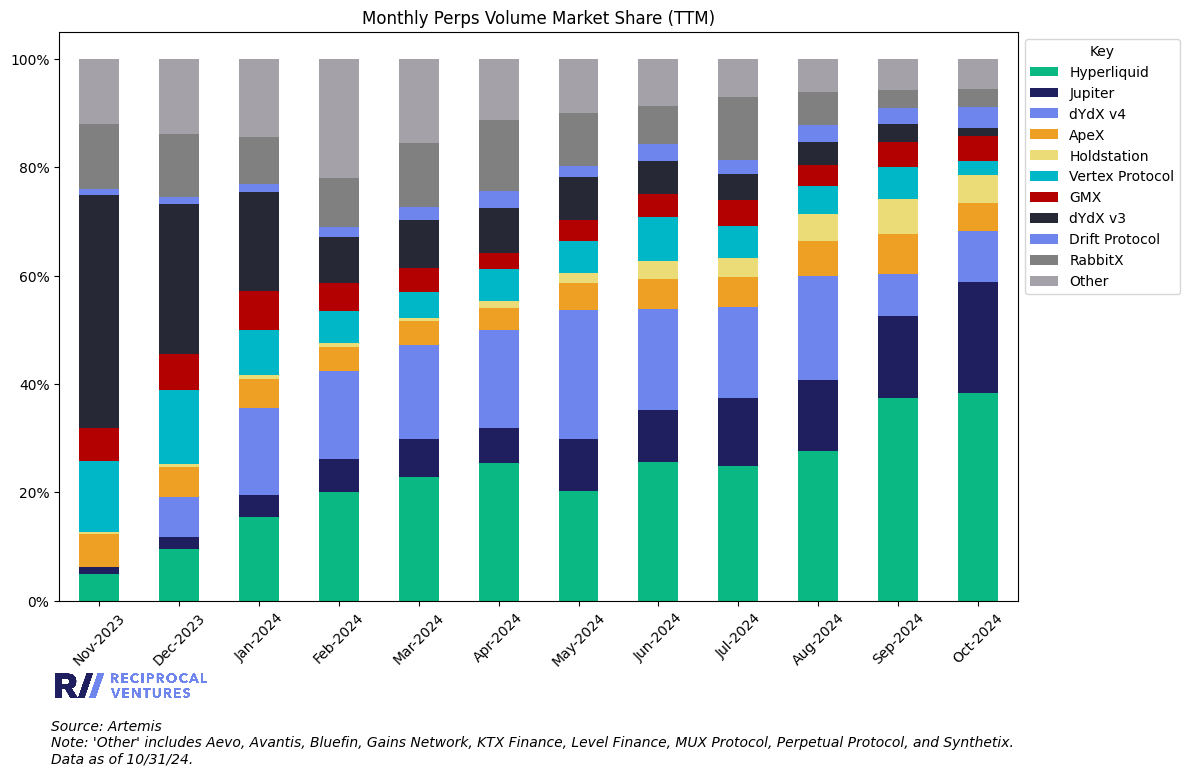

In [38]:
# Chart 1 chart
plot_perpetual_volumes(input_file)

In [39]:
## Chart 2: Hyperliquid Strict List Spot Market Cap (ITD)

In [40]:
# Chart 2 code

#Note: for the $RAGE market cap figure, I multiplied daily price from coingecko by 34,979,353, the circulating supply of $RAGE on 10/1/24 according to the token contract

# Define filepaths
data_file = 'Strict List Spot Market Cap_CoinGecko-Raw-Data.csv'
input_file = os.path.join(base_folder, data_file)


# Import colors
color_palette = {'blue 1':'#03045e', 'blue 2':'#0077b6', 'blue 3':'#00b4d8', 'blue 4':'#90e0ef', 'blue 5':'#caf0f8'}

# Function to generate the stacked area chart
def plot_Hyperliquid_transactions(file_path):
    # Step 1: Load the dataset
    data = pd.read_csv(file_path)

    # Step 2: Convert the "Date" column to datetime format
    data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
    
    # Step 3: Set variable for the last value in the date column
    last_date = data['Date'].iloc[-1].strftime('%m/%d/%y')
    
    # Step 4: Filter the data from June 2024 onwards
    data = data[data['Date'] >= '2024-06-05']

    # Step 5: Set the 'Date' column as the index (Keep it as datetime)
    data.set_index('Date', inplace=True)
    
    # Step 6: Select columns and reorder them based on the specified list
    columns_order = [
        '$PURR', '$HFUN', '$JEFF', '$RAGE', '$POINTS'
    ]
    data = data[columns_order]

    # Step 7: Create the stacked area chart using matplotlib
    fig, ax = plt.subplots(figsize=(12, 8))

    # Extract the color list from the color dictionary
    color_list = [platform_colors[col] for col in data.columns]
    
    # Plotting the stacked area chart with custom colors
    data.plot(kind='area', stacked=True, ax=ax, color=color_list, legend=True)

    # Setting labels and title
    ax.set_xlabel('')
    ax.set_title('Hyperliquid Strict List Spot Market Cap (ITD)')

    # Define a function to format the y-axis with commas
    def comma_formatter(x, pos):
        return f'{int(x):,}'
    
    # Apply the formatter to the y-axis
    ax.yaxis.set_major_formatter(FuncFormatter(comma_formatter))

    # Set custom x-axis labels on specific dates (Keep index as datetime)
    specific_dates = [ 
        '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31'
    ]
    specific_dates = pd.to_datetime(specific_dates)
    
    # Define a function to format the y-axis with commas
    def dollar_formatter(y, pos):
        return f'${int(y):,}'
    
    # Apply the formatter to the y-axis
    ax.yaxis.set_major_formatter(FuncFormatter(dollar_formatter))

    # Set x-axis ticks to only show the specified dates
    ax.set_xticks(specific_dates)
    ax.minorticks_off()
    ax.set_xticklabels([date.strftime('%b-%y') for date in specific_dates], rotation=45)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Add logo without specifying a path (default will be used)
    add_logo(ax)
    
    # Adjust text box location (e.g., position it in the lower-left corner)
    text_box = ax.text(0, -0.35, f"Source: CoinGecko\nNote: Data irrelgularities in May and June likely due to data collection issues by CoinGecko.\n$RAGE market cap calculated as price multipied by the circulating supply on 10/1/24.\n$CATBAL, $OMNIX, and $SCHIZO excluded due to insufficient tracking on CoinGecko.\nData as of {last_date}.",
                       transform=ax.transAxes, fontsize=10,
                       bbox=dict(facecolor='white', alpha=0), fontstyle='italic')

    # Display the plot
    plt.legend(title='Key', bbox_to_anchor=(.5, -0.105), loc='upper center',ncol=5)
    plt.tight_layout()
    plt.show()

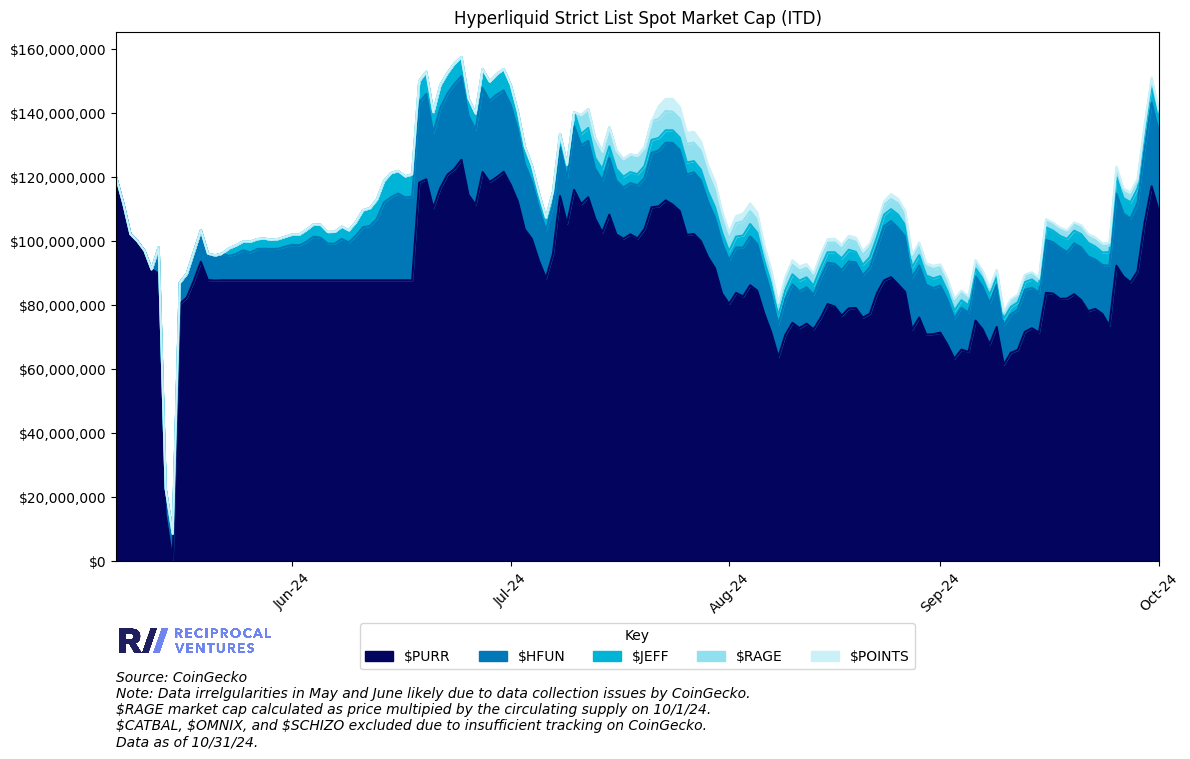

In [41]:
# Chart 2 chart
plot_Hyperliquid_transactions(input_file)

In [42]:
## Chart 3: Daily Unique User Count (TTM)

In [43]:
# Chart 3 code

# Define filepaths
data_file = 'Perpetuals - Perpetual Unique Users_Artemis-Raw-Data.csv'
input_file = os.path.join(base_folder, data_file)

# Function to generate the stacked area chart
def plot_unique_users(file_path):
    # Step 1: Load the dataset
    data = pd.read_csv(file_path)

    # Step 2: Convert the "Date" column to datetime format
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')
    
    # Step 3: Set variable for the last value in the date column
    last_date = data['Date'].iloc[-1].strftime('%m/%d/%y')

    # Step 4: Filter the data from 1st September 2024 onwards
    data = data[data['Date'] >= '2023-11-01']

    # Step 5: Select columns and reorder them based on the specified list
    columns_order = ['Hyperliquid', 'Jupiter', 'Holdstation', 'GMX', 'dYdX v4', 'dYdX v3']

    # Step 6: Create an "Other" category by summing the rest of the columns
    other_columns = [col for col in data.columns if col not in columns_order and col != 'Date']
    data['Other'] = data[other_columns].sum(axis=1)

    # Step 7: Keep only the desired columns plus the "Other" column
    data = data[['Date'] + columns_order + ['Other']]

    # Step 8: Set the 'Date' column as the index
    data.set_index('Date', inplace=True)

    # Step 9: Create the stacked area chart using matplotlib
    fig, ax = plt.subplots(figsize=(12, 8))

    # Extract the color list from the color dictionary
    color_list = [platform_colors[col] for col in data.columns if col != 'Date']
    
    # Plotting the stacked area chart with custom colors
    data.plot(kind='area', stacked=True, ax=ax, color=color_list)

    # Setting labels and title
    ax.set_xlabel('')
    ax.set_title('Daily Unique User Count (TTM)')
    
    # Set custom x-axis labels on specific dates (Keep index as datetime)
    specific_dates = [
        '2023-11-30','2023-12-31','2024-01-31', 
        '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30', 
        '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31'
    ]
    specific_dates = pd.to_datetime(specific_dates)

    # Define a function to format the y-axis with commas
    def comma_formatter(x, pos):
        return f'{int(x):,}'

    # Apply the formatter to the y-axis
    ax.yaxis.set_major_formatter(FuncFormatter(comma_formatter))

    # Set x-axis ticks to only show the specified dates
    ax.set_xticks(specific_dates)
    ax.minorticks_off()
    ax.set_xticklabels([date.strftime('%b-%y') for date in specific_dates], rotation=45)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Add logo without specifying a path (default will be used)
    add_logo(ax)
    
    # Add sources and note
    other_platforms_alphabetized = sorted(other_columns)
    if len(other_platforms_alphabetized) > 1:
        other_platforms_display = ', '.join(other_platforms_alphabetized[:-1]) + f", and {other_platforms_alphabetized[-1]}"
    else:
        other_platforms_display = other_platforms_alphabetized[0]

    # Adjust text box location (e.g., position it in the lower-left corner)
    text_box = ax.text(0, -0.4, f"Source: Artemis\nNote: 'Other' includes {other_platforms_display}.\nData as of {last_date}.",
                       transform=ax.transAxes, fontsize=10,
                       bbox=dict(facecolor='white', alpha=0), fontstyle='italic')

    # Adjust the legend positioning to make it fit within the plot area
    plt.legend(title='Platforms', bbox_to_anchor=(0.5, -0.15), loc='upper center',ncol=4)

    # Ensure the layout adapts to fit all elements (legend, text, etc.)
    plt.tight_layout()
    plt.show()

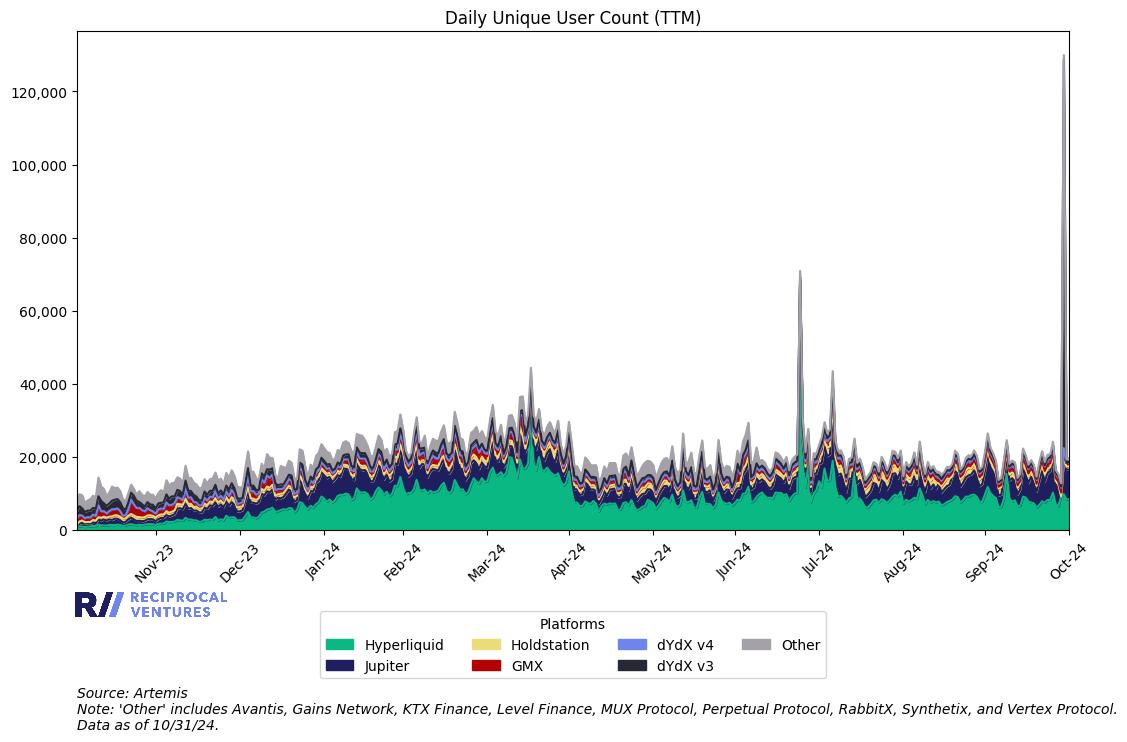

In [44]:
# Chart 3 chart
plot_unique_users(input_file)

In [45]:
## Chart 4: Hyperliquid TVL (ITD)

In [46]:
# Chart 4 code
# Define filepaths
data_file = 'Hyperliquid - TVL_Defillama-Raw-Data.csv'
input_file = os.path.join(base_folder, data_file)

# Function to generate the stacked area chart
def plot_Hyperliquid_transactions(file_path):
    # Step 1: Load the dataset
    data = pd.read_csv(file_path)

    # Step 2: Convert the "Date" column to datetime format
    data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
    
    # Step 3: Set variable for the last value in the date column
    last_date = data['Date'].iloc[-1].strftime('%m/%d/%y')

    # Step 4: Set the 'Date' column as the index (Keep it as datetime)
    data.set_index('Date', inplace=True)
    
    # Step 5: Select columns and reorder them based on the specified list
    columns_order = [
        'Perps', 'Spot'
    ]
    data = data[columns_order]
    
    # Step 6: Create the stacked area chart using matplotlib
    fig, ax = plt.subplots(figsize=(12, 8))

    # Extract the color list from the color dictionary
    color_list = [platform_colors[col] for col in data.columns]
    
    # Plotting the stacked area chart with custom colors
    data.plot(kind='area', stacked=True, ax=ax, color=color_list, legend=True)

    # Setting labels and title
    ax.set_xlabel('')
    ax.set_title('Hyperliquid TVL (ITD)')

    # Define a function to format the y-axis with commas
    def comma_formatter(x, pos):
        return f'{int(x):,}'
    
    # Apply the formatter to the y-axis
    ax.yaxis.set_major_formatter(FuncFormatter(comma_formatter))

    # Set custom x-axis labels on specific dates (Keep index as datetime)
    specific_dates = [
        '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31','2023-09-30','2023-10-31','2023-11-30','2023-12-31','2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30', 
        '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31'
    ]
    specific_dates = pd.to_datetime(specific_dates)
    
    # Define a function to format the y-axis with commas
    def dollar_formatter(y, pos):
        return f'${int(y):,}'
    
    # Apply the formatter to the y-axis
    ax.yaxis.set_major_formatter(FuncFormatter(dollar_formatter))

    # Set x-axis ticks to only show the specified dates
    ax.set_xticks(specific_dates)
    ax.minorticks_off()
    ax.set_xticklabels([date.strftime('%b-%y') for date in specific_dates], rotation=45)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Add logo without specifying a path (default will be used)
    add_logo(ax)
    
    # Adjust text box location (e.g., position it in the lower-left corner)
    text_box = ax.text(0, -0.25, f"Source: DefiLlama\nNote: Data as of {last_date}.",
                       transform=ax.transAxes, fontsize=10,
                       bbox=dict(facecolor='white', alpha=0), fontstyle='italic')

    # Display the plot
    plt.legend(title='Key', bbox_to_anchor=(.5, -0.105), loc='upper center',ncol=2)
    plt.tight_layout()
    plt.show()


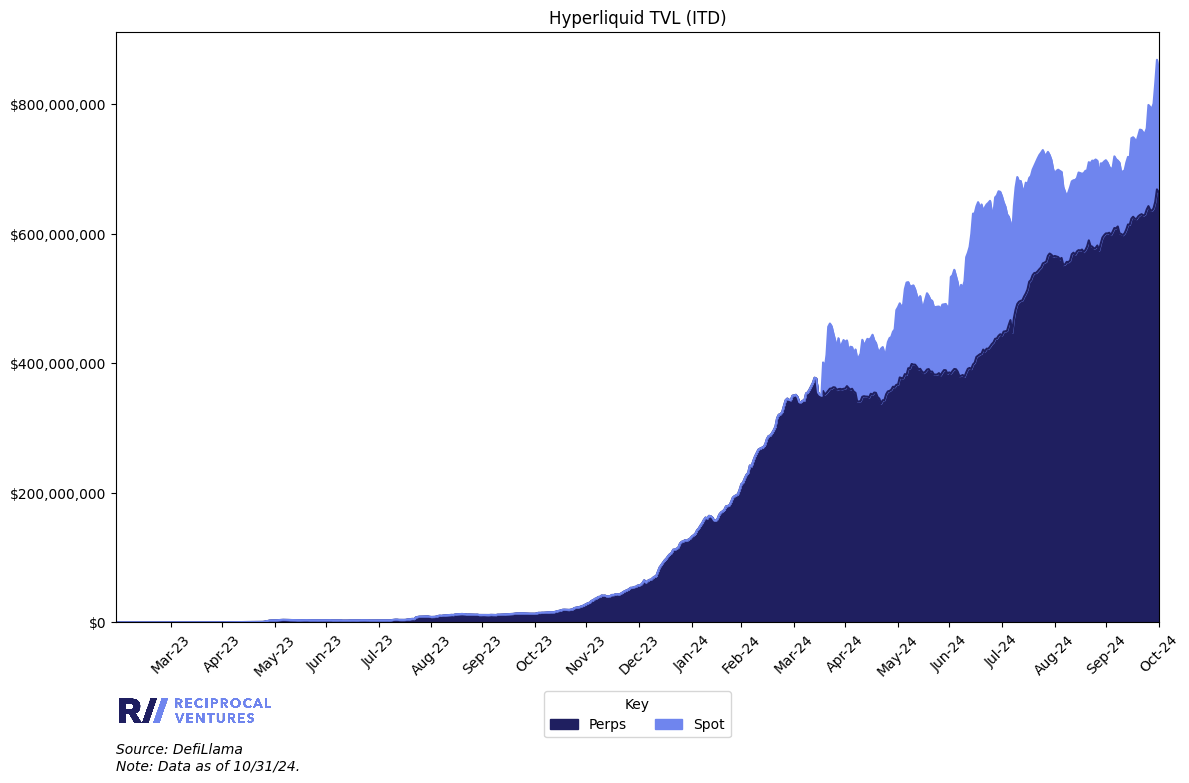

In [47]:
# Chart 4 chart

# Example usage
plot_Hyperliquid_transactions(input_file)

In [48]:
## Chart 5: Monthly Hyperliquid Perps Volume Market Share (April 2024 - June 2024)

In [49]:
# Chart 5 code

# Define filepaths
data_file = 'Perpetuals - Perpetual Trading Volumes_Artemis-Raw-Data.csv'
input_file = os.path.join(base_folder, data_file)

# Import colors
color_palette = {'Hyperliquid': '#09b882'}

# Function to generate the bar chart for Hyperliquid's percentage of total volume
def plot_hyperliquid_percentage(file_path):
    # Step 1: Load the dataset
    data = pd.read_csv(file_path)

    # Step 2: Convert the "Date" column to datetime format
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')
    
    # Step 3: Set variable for the last value in the date column
    last_date = data['Date'].iloc[-1].strftime('%m/%d/%y')

    # Step 4: Filter the data between April and June 2024
    data = data[(data['Date'] >= '2024-04-01') & (data['Date'] <= '2024-06-30')]

    # Step 5: Resample the data to monthly frequency and sum the volumes
    monthly_data = data.set_index('Date').resample('ME').sum()

    # Step 6: Calculate Hyperliquid's volume as a percentage of the total volume
    monthly_data['Total_Volume'] = monthly_data.sum(axis=1)  # Total volume across all platforms including 'Hyperliquid'
    monthly_data['Hyperliquid_Percentage'] = (monthly_data['Hyperliquid'] / monthly_data['Total_Volume']) * 100

    # Step 7: Create the bar chart
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plotting the bar chart for Hyperliquid's percentage with thicker bars
    bar_width = 15  # Adjust this value to change the bar thickness
    ax.bar(monthly_data.index, monthly_data['Hyperliquid_Percentage'], width=bar_width, color='#09b882', label='Hyperliquid')

    # Add logo without specifying a path (default will be used)
    add_logo(ax)

    # Add text box for source
    ax.text(0, -0.1, f"Source: Artemis\nNote: Data as of {last_date}.", transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0), fontstyle='italic')

    # Setting labels and title
    ax.set_xticks(monthly_data.index)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.xticks(rotation=0)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
    ax.set_title('Monthly Hyperliquid Perps Volume Market Share (April 2024 - June 2024)')

    # Ensure the y-axis starts from 0 to remove whitespace at the bottom
    ax.set_ylim(0, monthly_data['Hyperliquid_Percentage'].max() * 1.1)  # Slightly above the max value

    # Adjust layout to remove whitespace
    plt.tight_layout(pad=0.5)
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.15)

    # Display the plot
    plt.show()

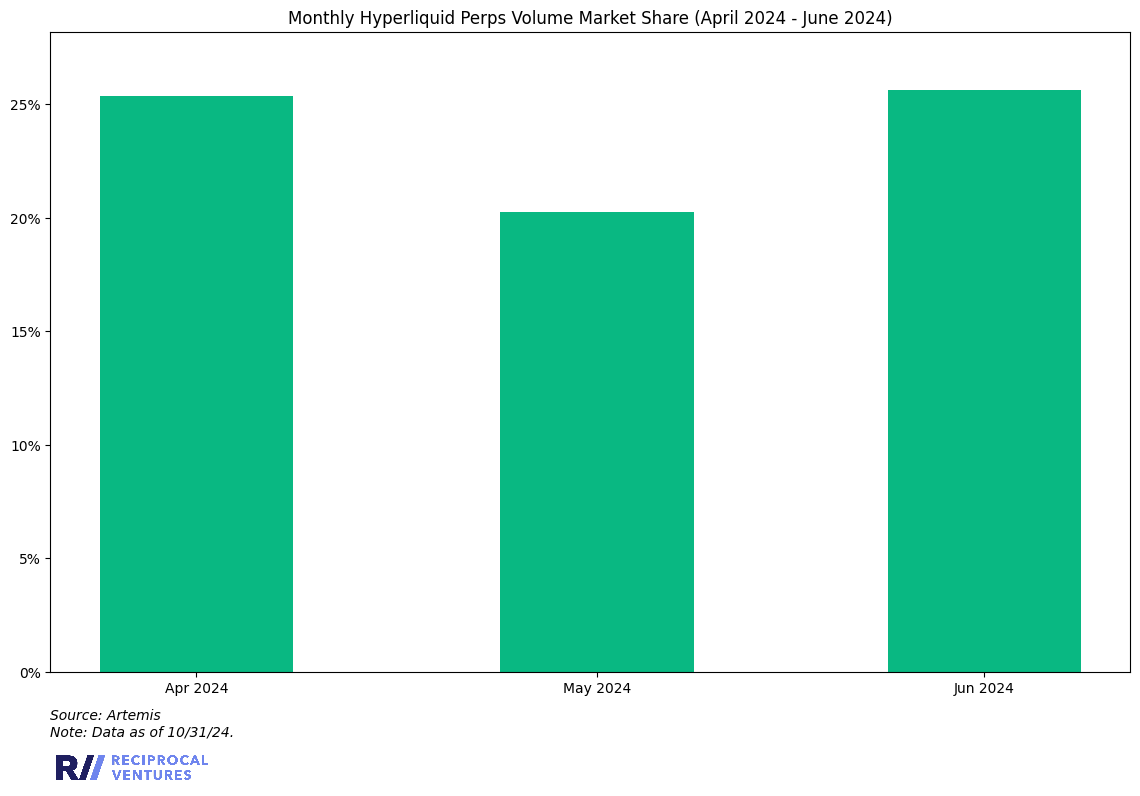

In [50]:
# Chart 5 chart
plot_hyperliquid_percentage(input_file)

In [51]:
## Chart 6: Weekly Hyperliquid Perps Volume Market Share (TTM)

In [52]:
# Chart 6 code

# Define filepaths
data_file = 'Perpetuals - Perpetual Trading Volumes_Artemis-Raw-Data.csv'
input_file = os.path.join(base_folder, data_file)

# Function to generate the area chart for Hyperliquid's percentage of total volume
def plot_hyperliquid_percentage(file_path):
    # Step 1: Load the dataset
    data = pd.read_csv(file_path)

    # Step 2: Convert the "Date" column to datetime format
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')
    
    # Step 2.5: Set variable for the last value in the date column
    last_date = data['Date'].iloc[-1].strftime('%m/%d/%y')

    # Step 3: Filter the data from 1st September 2023 onwards
    data = data[data['Date'] >= '2023-11-01']

    # Step 4: Resample the data to weekly frequency and sum the volumes
    weekly_data = data.set_index('Date').resample('W').sum()

    # Step 5: Calculate Hyperliquid's volume as a percentage of the total volume
    weekly_data['Total_Volume'] = weekly_data.sum(axis=1)  # Total volume across all platforms
    weekly_data['Hyperliquid_Percentage'] = (weekly_data['Hyperliquid'] / weekly_data['Total_Volume']) * 100

    # Set custom x-axis labels on specific dates (Keep index as datetime)
    specific_dates = [
        '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31', 
        '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31'
    ]
    specific_dates = pd.to_datetime(specific_dates)
    
    # Step 6: Create the area chart
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot Hyperliquid's percentage as an area chart
    ax.fill_between(weekly_data.index, weekly_data['Hyperliquid_Percentage'], color='#09b882', alpha=0.6)
    
    # Add logo
    add_logo(ax)
    
    # Adjust text box location (e.g., position it in the lower-left corner)
    text_box = ax.text(0, -0.25, f"Source: Artemis\nNote: Data as of {last_date}.",
                       transform=ax.transAxes, fontsize=10,
                       bbox=dict(facecolor='white', alpha=0), fontstyle='italic')

    # Setting labels and title
    ax.set_xticks(specific_dates)
    plt.xticks(rotation=45)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
    ax.set_title('Weekly Hyperliquid Perps Volume Market Share (TTM)')

    # Set x-axis limits to match the data range
    ax.set_xlim([weekly_data.index.min(), weekly_data.index.max()])

    # Ensure the y-axis starts from 0 to remove whitespace at the bottom
    ax.set_ylim(0, weekly_data['Hyperliquid_Percentage'].max() * 1.05)  # Slightly above the max value

    # Adjust layout to remove whitespace between chart and x-axis, and fill width
    plt.tight_layout(pad=0.5)  # Reduces space around the chart
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.15)  # Adjust the bounds to remove extra white space

    # Display the plot
    plt.show()

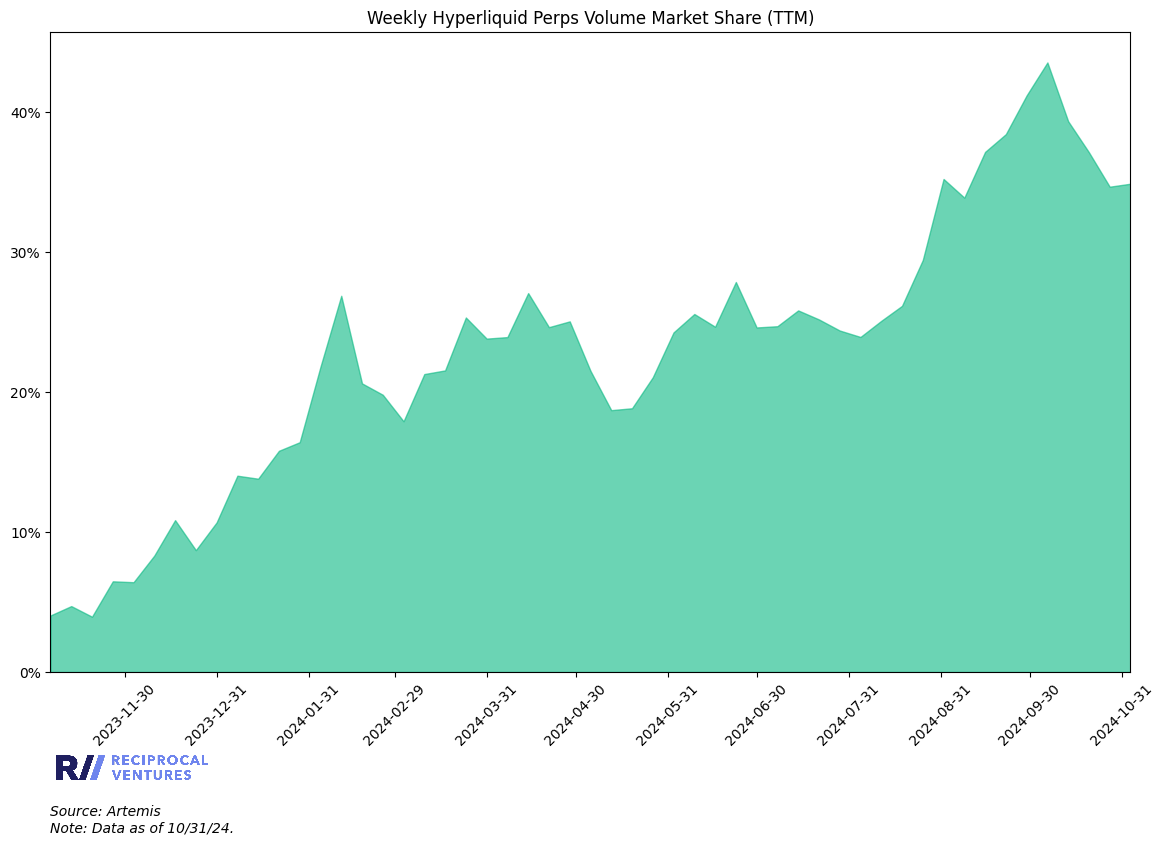

In [53]:
# Chart 6 chart
plot_hyperliquid_percentage(input_file)

In [54]:
## Chart 7: Percent Change in Market Share (Month-over-Month)

In [67]:
# Chart 7 code

# Function to calculate and display percent change in market share as a table using Matplotlib
def calculate_market_share_percent_change(file_path):
    # Step 1: Load the dataset
    data = pd.read_csv(file_path)

    # Step 2: Convert the "Date" column to datetime format
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

    # Step 3: Filter the data from 1st September 2023 onwards
    data = data[data['Date'] >= '2023-10-01']

    # Step 4: Resample the data to monthly frequency and sum the volumes (using 'M' for month-end)
    monthly_data = data.set_index('Date').resample('ME').sum()

    # Step 5: Select columns and reorder them based on the specified list
    columns_order = [
        'Hyperliquid', 'Jupiter', 'dYdX v4', 'ApeX', 'Holdstation', 
        'Vertex Protocol', 'GMX', 'dYdX v3', 'Drift Protocol', 
        'RabbitX'
    ]

    # Step 6: Keep only the desired columns
    monthly_data = monthly_data[columns_order]

    # Step 7: Calculate the total volume for each month
    total_volume = monthly_data.sum(axis=1)

    # Step 8: Calculate the market share for each platform
    market_share_data = monthly_data.div(total_volume, axis=0) * 100  # Express as percentages

    # Step 9: Calculate the percent change in market share month-over-month
    percent_change_market_share = market_share_data.pct_change() * 100  # Convert to percent change

    # Step 10: Replace infinite values with NaN to avoid conversion issues
    percent_change_market_share.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

    # Step 11: Format the index to display "Month-Year"
    percent_change_market_share.index = percent_change_market_share.index.strftime('%b-%y')

    # Step 12: Remove "Sep-23" row by filtering the DataFrame
    percent_change_market_share = percent_change_market_share.loc[percent_change_market_share.index != 'Oct-23']

    # Step 13: Get the raw Hyperliquid value for May-24 for comparison (from raw numeric data)
    try:
        hyperliquid_threshold = percent_change_market_share.loc['May-24', 'Hyperliquid']
    except KeyError:
        raise ValueError("May-24 Hyperliquid data is missing. Ensure your data contains this date.")

    # Step 14: Convert the values to strings for display with percentage signs, but ignore NaN
    percent_change_market_share_display = percent_change_market_share.map(lambda x: f"{int(x)}%" if pd.notna(x) else '')

    # Step 15: Plot the table using Matplotlib
    fig, ax = plt.subplots(figsize=(10, 5))  # Adjust figure size as necessary
    ax.axis('tight')
    ax.axis('off')

    # Create a table plot
    table = ax.table(cellText=percent_change_market_share_display.values,
                     colLabels=percent_change_market_share_display.columns,
                     rowLabels=percent_change_market_share_display.index,
                     cellLoc='center', loc='center')

    # Step 16: Highlight cells based on the comparison with the Hyperliquid threshold for May-24
    for i in range(len(percent_change_market_share.index)):
        for j in range(len(percent_change_market_share.columns)):
            # Extract the raw numeric value for comparison
            cell_value = percent_change_market_share.iloc[i, j]
            # Perform the comparison and only highlight the correct cells
            if pd.notna(cell_value) and cell_value <= hyperliquid_threshold:
                table[i+1, j].set_facecolor('#ffcccc')  # Highlight with a light red color

    # Adjust column widths to fit the content better
    table.auto_set_column_width(col=list(range(len(percent_change_market_share_display.columns))))
    table.scale(1.2, 1.2)  # Adjust scaling to make the columns narrower

    # Add title using `suptitle` and control its position
    fig.suptitle('MoM Percent Change in Market Share (TTM)', y=0.95)
    
    # Add logo
    add_logo(ax)

    # Adjust the layout to move the table slightly lower
    plt.subplots_adjust(top=1)  # You can adjust this to control the position of the table

    # Display the table plot
    plt.show()

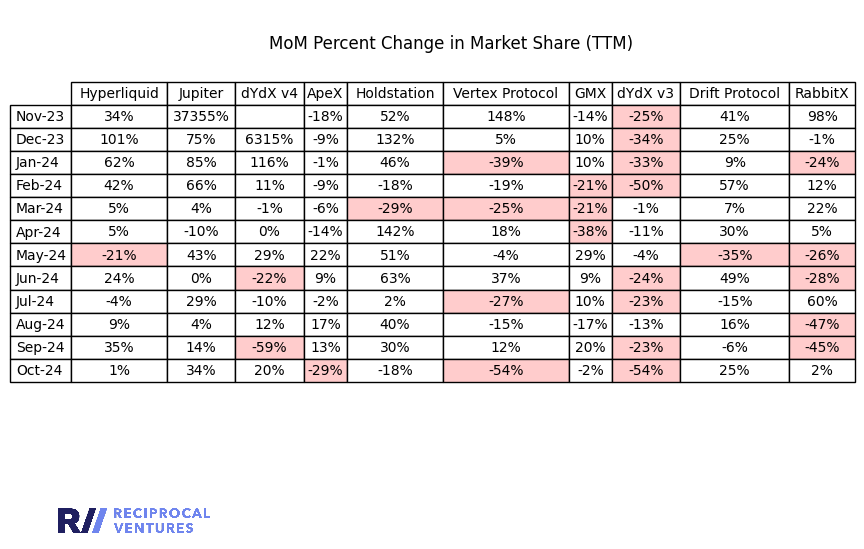

In [68]:
# Chart 7 chart
calculate_market_share_percent_change(input_file)

In [57]:
## Chart 8: Indexed Market Share Over Time (Log Scale, TGE = 100%)

In [58]:
# Chart 8 code

# Define filepaths
data_file = 'Perpetuals - Perpetual Trading Volumes_Artemis-Raw-Data.csv'
input_file = os.path.join(base_folder, data_file)

# Define TGE dates for each platform
tge_dates = {
    'Jupiter': '2024-01-31',
    'Holdstation': '2023-11-24',
    'GMX': '2021-09-11',
    'dYdX': '2021-08-03',
    'Gains Network': '2021-11-01',
    'KTX Finance': '2023-06-05',
    'RabbitX': '2023-05-01',
    'Vertex Protocol': '2023-11-20',
    'Aevo': '2024-03-12',
    'ApeX': '2024-04-26',
    'Drift Protocol': '2024-05-15'
}

# Function to process the data and generate the indexed market share line chart
def plot_indexed_market_share(file_path):
    # Step 1: Load the dataset
    data = pd.read_csv(file_path)

    # Step 2: Convert the "Date" column to datetime format
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')
    
    # Step 3: Set variable for the last value in the date column
    last_date = data['Date'].iloc[-1].strftime('%m/%d/%y')

    # Step 4: Combine 'dYdX v3' and 'dYdX v4' into 'dYdX' for each date
    data['dYdX'] = data['dYdX v3'].fillna(0) + data['dYdX v4'].fillna(0)
    data = data[['Date', 'Jupiter', 'Holdstation', 'GMX', 'dYdX', 
                 'Gains Network', 'KTX Finance', 'RabbitX', 
                 'Vertex Protocol', 'Aevo', 'ApeX', 'Drift Protocol']]

    # Step 5: Calculate daily total volume across all projects
    data['Total Volume'] = data.drop(columns='Date').sum(axis=1)

    # Step 6: Calculate market share for each project
    for platform in ['Jupiter', 'Holdstation', 'GMX', 'dYdX', 'Gains Network', 
                     'KTX Finance', 'RabbitX', 'Vertex Protocol', 'Aevo', 'ApeX', 'Drift Protocol']:
        data[platform] = (data[platform] / data['Total Volume']) * 100

    # Step 7: Initialize an empty dataframe for processed data
    result_data = pd.DataFrame()

    # Step 8: Process each platform to index its market share to its TGE market share
    max_days = 360  # Limit to T+360 days
    for platform, tge_date in tge_dates.items():
        tge_date = pd.to_datetime(tge_date)

        if tge_date in data['Date'].values:
            # Filter data from TGE date onwards
            platform_data = data[data['Date'] >= tge_date].copy()

            # Calculate "Days since TGE"
            platform_data['Days since TGE'] = (platform_data['Date'] - tge_date).dt.days

            # Get the TGE market share for the platform
            tge_market_share = platform_data.loc[platform_data['Days since TGE'] == 0, platform].iloc[0]

            # Index subsequent market shares to the TGE market share
            platform_data[platform] = (platform_data[platform] / tge_market_share) * 100

            # Filter up to T+360 days
            platform_data = platform_data[platform_data['Days since TGE'] <= max_days]

            # Keep only "Days since TGE" and platform data
            platform_data = platform_data[['Days since TGE', platform]]

            # Merge the results
            if result_data.empty:
                result_data = platform_data
            else:
                result_data = pd.merge(result_data, platform_data, on='Days since TGE', how='outer')


    # Step 9: Create the line chart using matplotlib
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plotting the line chart with custom colors
    for platform in [ 'Aevo',  'ApeX',  'Drift Protocol',  'dYdX',  'Gains Network',  'GMX',  'Holdstation',  'RabbitX',  'Vertex Protocol', 'Jupiter', 'KTX Finance']:
        ax.plot(
            result_data['Days since TGE'], 
            result_data[platform], 
            label=platform, 
            color=platform_colors[platform],
            linewidth=2
        )

    # Step 10: Set x-axis to show "days since TGE" (every 30 days)
    x_ticks = range(0, max_days + 1, 30)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([f't+{i}' for i in x_ticks])

    # Setting labels and title
    ax.set_xlabel('Days Since TGE')
    ax.set_ylabel('Indexed Market Share (Log Scale)')
    ax.set_title('Indexed Market Share Over Time (Log Scale, TGE = 100%)')

    # Define a function to format the y-axis as percentages
    def percent_formatter(x, pos):
        return f'{int(x)}%'

    # Apply the percentage formatter to the y-axis
    ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))

    # Set y-axis to logarithmic scale
    ax.set_yscale('log')

    # Set y-axis limits with lower bound as 10 (10^1)
    ax.set_ylim(10, max(result_data.max().max(), 120))

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Add grid lines for better readability
    ax.grid(True, linestyle='--', alpha=0.7)

    # Add logo
    add_logo(ax)

    # Add sources and note
    text_box = ax.text(0, -0.55, f"Source: Artemis\nNote: Indexed market shares to each platform's TGE date. Combined 'dYdX v3' and 'dYdX v4' into 'dYdX'.\nAvantis, Level Finance, MUX Protocol, Perpetual Protocol, and Synthetix excluded due to insufficient data.\nBluefin and Hyperliquid excluded because they do not have liquid tokens.\nData as of {last_date}.",
                       transform=ax.transAxes, fontsize=10,
                       bbox=dict(facecolor='white', alpha=0), fontstyle='italic')

    # Center the legend below the chart
    plt.legend(title='Platforms', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4)

    # Ensure the layout adapts to fit all elements (legend, text, etc.)
    plt.tight_layout()
    plt.show()

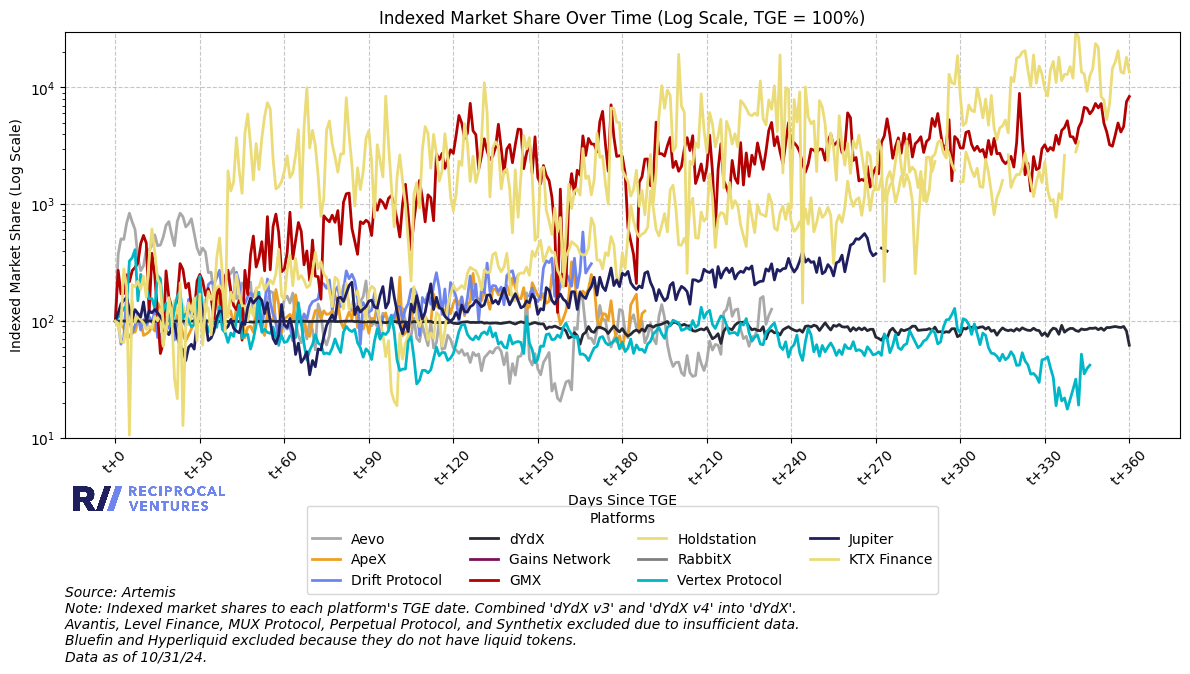

In [59]:
# Chart 8 chart
plot_indexed_market_share(input_file)


In [60]:
## Chart 9: Quarterly Perps Volume Market Share (1Q21 - 3Q24)

In [61]:
# Chart 9 code

# Define filepaths
data_file = 'Perpetuals - Perpetual Trading Volumes_Artemis-Raw-Data.csv'
input_file = os.path.join(base_folder, data_file)


# Function to generate the 100% stacked bar chart
def plot_perpetual_volumes(file_path):
    # Step 1: Load the dataset
    data = pd.read_csv(file_path)

    # Step 2: Convert the "Date" column to datetime format
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')
    
    # Step 3: Set variable for the last value in the date column
    last_date = data['Date'].iloc[-1].strftime('%m/%d/%y')

    # Step 4: Filter the data from 1st January 2024 onwards
    data = data[data['Date'] >= '2021-03-01']

    # Step 5: Resample the data to quarterly frequency and sum the volumes
    quarterly_data = data.set_index('Date').resample('QE').sum()

    # Step 6: Select columns and reorder them based on the specified list
    columns_order = [
        'Hyperliquid', 'GMX'
    ]

    # Step 6: Create an "Other" category by summing the rest of the columns
    other_columns = [col for col in quarterly_data.columns if col not in columns_order]
    quarterly_data['Other'] = quarterly_data[other_columns].sum(axis=1)

    # Step 7: Keep only the desired columns plus the "Other" column
    quarterly_data = quarterly_data[columns_order + ['Other']]

    # Step 8: Normalize the data to percentages (100% stacked)
    quarterly_data_percentage = quarterly_data.div(quarterly_data.sum(axis=1), axis=0) * 100

    # Step 9: Modify the x-axis to show "Quarter-Year"
    quarterly_data_percentage.index = quarterly_data_percentage.index.to_period('Q').strftime('Q%q-%Y')

    # Step 10: Create the 100% stacked bar chart using matplotlib
    fig, ax = plt.subplots(figsize=(12, 8))

    # Extract the color list from the color dictionary
    color_list = [platform_colors[col] for col in quarterly_data_percentage.columns]
    
    # Plotting the 100% stacked bar chart with custom colors
    quarterly_data_percentage.plot(kind='bar', stacked=True, ax=ax, color=color_list)

    # Setting labels and title
    ax.set_xlabel('')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_title('Quarterly Perps Volume Market Share (1Q21 - 3Q24)')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=0)
    
    # Add logo
    add_logo(ax)
    
    # Add sources and note
    other_platforms_alphabetized = sorted(other_columns)
    if len(other_platforms_alphabetized) > 1:
        other_platforms_display = ', '.join(other_platforms_alphabetized[:-1]) + f", and {other_platforms_alphabetized[-1]}"
    else:
        other_platforms_display = other_platforms_alphabetized[0]

    # Split the 'Other' note into multiple lines if it's too long
    max_length = 124  # Set the max length for each line
    other_platforms_lines = [other_platforms_display[i:i+max_length] for i in range(0, len(other_platforms_display), max_length)]
    other_platforms_multiline = '\n'.join(other_platforms_lines)

    # Modify the text_box to accommodate multiple lines
    text_box = ax.text(-0.6, -30, f"Source: Artemis\nNote: 'Other' includes {other_platforms_multiline}.\nData as of {last_date}.", 
                       bbox=dict(facecolor='white', alpha=0), fontstyle='italic')

    # Display the plot
    plt.legend(title='Key', bbox_to_anchor=(0.5, -0.15), loc='center', ncol=5)
    plt.tight_layout()
    plt.show()

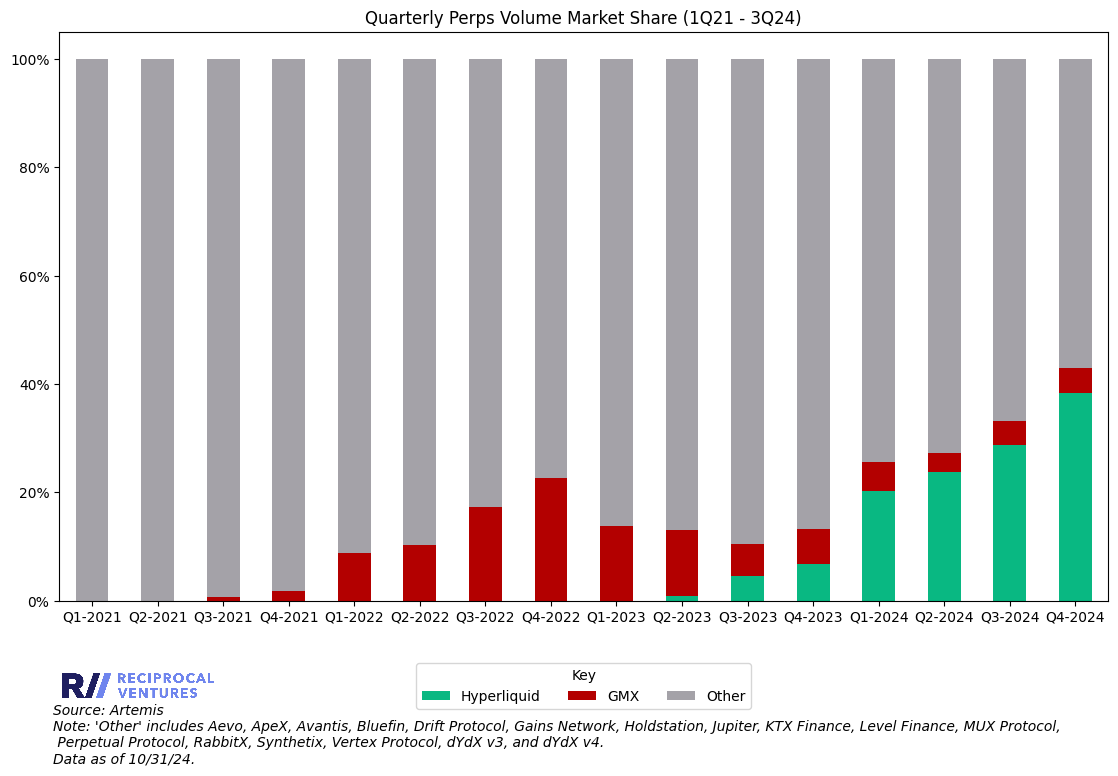

In [62]:
# Chart 9 chart
plot_perpetual_volumes(input_file)